**Nama : Annisa Mustika Anggraeni**</br>
**NIM : 211351020**</br>
**Kelas : Pagi A**

# Import dataset kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annimuss","key":"fd737110693a9113749ff68f2f049db5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 7.23MB/s]


In [ ]:
!mkdir heart-attack-analysis-prediction-dataset
!unzip heart-attack-analysis-prediction-dataset.zip -d heart-attack-analysis-prediction-dataset
!ls heart-attack-analysis-prediction-dataset

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart-attack-analysis-prediction-dataset/heart.csv  
  inflating: heart-attack-analysis-prediction-dataset/o2Saturation.csv  
heart.csv  o2Saturation.csv


# Import Library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

# Import dataset

In [ ]:
df = pd.read_csv('heart-attack-analysis-prediction-dataset/heart.csv')

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data discovery

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# Mengecek duplikat keseluruhan pada DataFrame
overall_duplicates = df[df.duplicated()]
print("Duplikat Keseluruhan:")
print(overall_duplicates)

Duplikat Keseluruhan:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [ ]:
# Menghapus duplikat dan mengganti DataFrame yang ada
df.drop_duplicates(inplace=True)

# Menampilkan DataFrame setelah menghapus duplikat
print("DataFrame setelah menghapus duplikat:")
print(df)

DataFrame setelah menghapus duplikat:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  tha

In [ ]:
# Mereset indeks dan menghapus indeks lama
df = df.reset_index(drop=True)

In [ ]:
df.shape

(302, 14)

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
ind_col = [col for col in df.columns if col != 'output']
dep_col = 'output'

In [ ]:
df['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [ ]:
x =df[ind_col]
y = df[dep_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (211, 13)
test shape: (91, 13)


# Modeling

In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=x.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 290 (1.13 KB)
Trainable params: 290 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


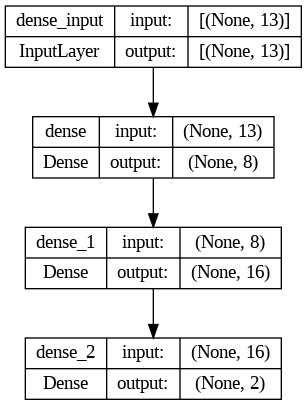

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
optim = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1
epochs = 15

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/15
189/189 [==============================] - 4s 7ms/step - loss: 3.5045 - acc: 0.4868 - val_loss: 0.3881 - val_acc: 0.8182
Epoch 2/15
189/189 [==============================] - 1s 4ms/step - loss: 0.9763 - acc: 0.5873 - val_loss: 0.6098 - val_acc: 0.6364
Epoch 3/15
189/189 [==============================] - 1s 5ms/step - loss: 0.8210 - acc: 0.6508 - val_loss: 0.7323 - val_acc: 0.5000
Epoch 4/15
189/189 [==============================] - 1s 5ms/step - loss: 0.7625 - acc: 0.6720 - val_loss: 0.3631 - val_acc: 0.8182
Epoch 5/15
189/189 [==============================] - 1s 7ms/step - loss: 0.6952 - acc: 0.6508 - val_loss: 0.3056 - val_acc: 0.9091
Epoch 6/15
189/189 [==============================] - 1s 4ms/step - loss: 0.7648 - acc: 0.6455 - val_loss: 0.3057 - val_acc: 0.9091
Epoch 7/15
189/189 [==============================] - 1s 4ms/step - loss: 0.6941 - acc: 0.6984 - val_loss: 0.3154 - val_acc: 0.9091
Epoch 8/15
189/189 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

3/3 [==============================] - 0s 4ms/step
0.7692307692307693


In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.5660 - acc: 0.7692


[0.5659882426261902, 0.7692307829856873]

In [ ]:
prediction = model.predict([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0, 0,	1]])
print(prediction)

1/1 [==============================] - 0s 81ms/step
[[0.07623306 0.923767  ]]


# Simulasi Model

In [ ]:
prediction = model.predict([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
    print('Terkena serangan jantung')
else:
    print('Tidak terkena serangan jantung')

1/1 [==============================] - 0s 40ms/step
Terkena serangan jantung


In [ ]:
prediction = model.predict([[57,	0,	0,	140,	241,	0,	1,	123,	1,	0.2,	1,	0,	3]])
predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
    print('Terkena serangan jantung')
else:
    print('Tidak terkena serangan jantung')

1/1 [==============================] - 0s 52ms/step
Tidak terkena serangan jantung


# Save model

In [ ]:
model.save('./heart.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('.//heart.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heart.tflite", "wb").write(tflite_model)

3256